In [3]:
import tensorflow as tf
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import os

In [3]:
print(tf. __version__)

2.8.0


In [2]:
# Load the data
data_path = 'snapshots_20_J1'
file_names = os.listdir(data_path)
data = []
labels = []
for file_name in file_names:
    temperature = float(file_name.split('_')[1])/100  # Extract the temperature from the file name
    if temperature <= 2.26:  # Ordered phase
        label = 0
    else:  # Disordered phase
        label = 1
    file_path = os.path.join(data_path, file_name)
    with open(file_path, 'r') as f:
        file_data = np.loadtxt(f)
        file_data = np.expand_dims(file_data, axis=-1)  # Add a channel dimension
        data.append(file_data)
        labels.append(label)
data = np.array(data)
labels = np.array(labels)

In [7]:
np.shape(data)

(20000, 20, 20, 1)

In [20]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(20,20,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 18, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 64)                3

In [21]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# Train the model
history = model.fit(data, labels, epochs=50, validation_split=0.2)

Epoch 1/50
500/500 [==============================] - 3s 4ms/step - loss: 0.4540 - accuracy: 0.7743 - val_loss: 0.3412 - val_accuracy: 0.9298
Epoch 2/50
500/500 [==============================] - 2s 4ms/step - loss: 0.3844 - accuracy: 0.8117 - val_loss: 0.4432 - val_accuracy: 0.8533
Epoch 3/50
500/500 [==============================] - 2s 4ms/step - loss: 0.3729 - accuracy: 0.8170 - val_loss: 0.4259 - val_accuracy: 0.8410
Epoch 4/50
500/500 [==============================] - 2s 4ms/step - loss: 0.3656 - accuracy: 0.8241 - val_loss: 0.8945 - val_accuracy: 0.5332
Epoch 5/50
500/500 [==============================] - 2s 4ms/step - loss: 0.3630 - accuracy: 0.8246 - val_loss: 0.3670 - val_accuracy: 0.9080
Epoch 6/50
500/500 [==============================] - 2s 4ms/step - loss: 0.3533 - accuracy: 0.8329 - val_loss: 0.3026 - val_accuracy: 0.9220
Epoch 7/50
500/500 [==============================] - 2s 4ms/step - loss: 0.3405 - accuracy: 0.8381 - val_loss: 0.3081 - val_accuracy: 0.9153
Epoch 

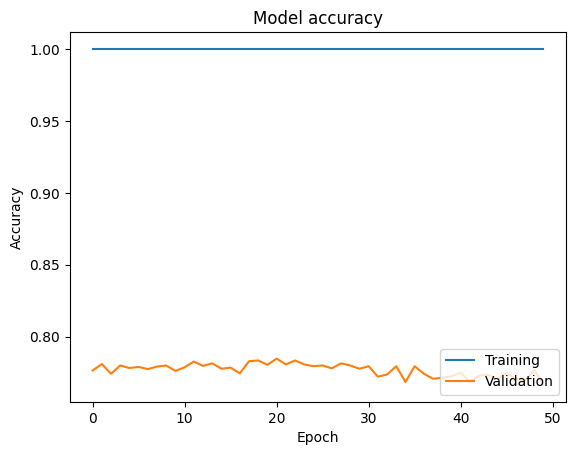

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

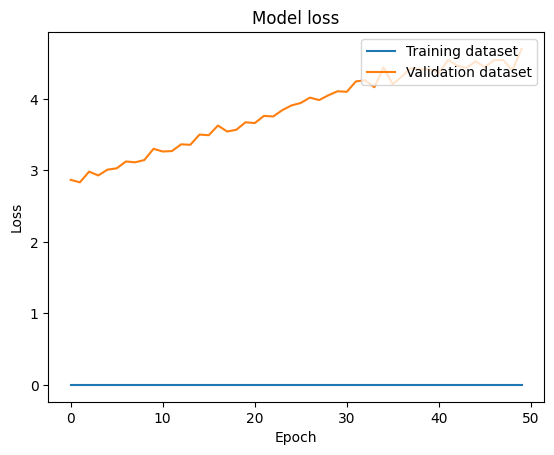

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training dataset', 'Validation dataset'], loc='upper right')
plt.show()

In [10]:
# Load the test data
data_path = 'test_20_misclassification'
file_names = os.listdir(data_path)
test_data = []
test_labels = []
for file_name in file_names:
    temperature = float(file_name.split('_')[1])/100  # Extract the temperature from the file name
    if temperature <= 2.26:  # Ordered phase
        label = 0
    else:  # Disordered phase
        label = 1
    file_path = os.path.join(data_path, file_name)
    with open(file_path, 'r') as f:
        file_data = np.loadtxt(f)
        file_data = np.expand_dims(file_data, axis=-1)  # Add a channel dimension
        test_data.append(file_data)
        test_labels.append(label)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [11]:
test_loss, test_acc = model.evaluate(test_data, test_labels, batch_size=10)

500/500 [==============================] - 2s 2ms/step - loss: 7.7349 - accuracy: 0.5390


In [12]:
for i in range(50):
    test_loss, test_acc = model.evaluate(test_data[i*100:(i+1)*100], test_labels[i*100:(i+1)*100], batch_size=5)

20/20 [==============================] - 0s 4ms/step - loss: 8.4480 - accuracy: 0.5200


In [5]:
len(test_data)

5000

In [29]:
test_loss, test_acc = model.evaluate(test_data, test_labels, batch_size=10)

500/500 [==============================] - 2s 4ms/step - loss: 1.5984 - accuracy: 0.5466


In [31]:
for i in range(50):
    test_loss, test_acc = model.evaluate(test_data[i*100:(i+1)*100], test_labels[i*100:(i+1)*100], batch_size=5)

20/20 [==============================] - 0s 5ms/step - loss: 1.7644 - accuracy: 0.6400


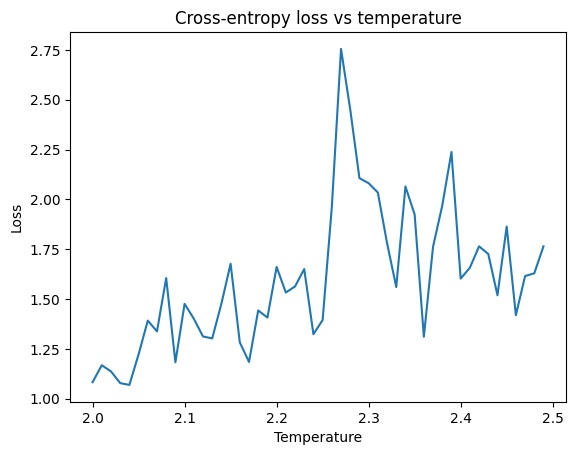

In [5]:
loss_list = [1.083, 1.1678, 1.1371, 1.0782, 1.0692, 1.2224, 1.3919, 1.3378, 1.6051, 1.1827, 1.4759, 1.4014, 1.3123,
             1.3024, 1.4766, 1.6771, 1.2824, 1.1845, 1.4427, 1.407, 1.6608, 1.5327, 1.5631, 1.6504, 1.3235, 1.3946,
             1.9618, 2.7546, 2.4508, 2.1064, 2.0811, 2.0344, 1.7807, 1.5603, 2.0645, 1.9239, 1.3108, 1.7626, 1.9689,
             2.2375, 1.6025, 1.6571, 1.7644, 1.726, 1.5189, 1.8638, 1.4188, 1.6152, 1.6291, 1.7644]
bins = [2+0.01*i for i in range(50)]
plt.plot(bins, loss_list)
plt.title('Cross-entropy loss vs temperature')
plt.ylabel('Loss')
plt.xlabel('Temperature')
#plt.legend(['Training dataset', 'Validation dataset'], loc='upper right')
plt.show()

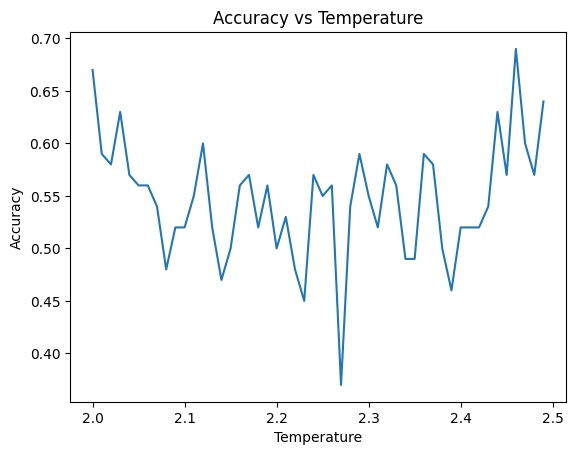

In [4]:
acc_list = [0.67, 0.59, 0.58, 0.63, 0.57, 0.56, 0.56, 0.54, 0.48, 0.52, 0.52, 0.55, 0.6, 0.52, 0.47, 0.5, 0.56, 0.57, 0.52,
            0.56, 0.5, 0.53, 0.48, 0.45, 0.57, 0.55, 0.56, 0.37, 0.54, 0.59, 0.55, 0.52, 0.58, 0.56, 0.49,
0.49, 0.59, 0.58, 0.5, 0.46, 0.52, 0.52, 0.52, 0.54, 0.63, 0.57, 0.69, 0.6, 0.57, 0.64]
plt.plot(bins, acc_list)
plt.title('Accuracy vs Temperature')
plt.ylabel('Accuracy')
plt.xlabel('Temperature')
#plt.legend(['Training dataset', 'Validation dataset'], loc='upper right')
plt.show()